In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [4]:
data = pd.DataFrame({
    '공부시간': [1, 2, 3, 4, 5],
    '점수': [50, 55, 65, 70, 80]
})
correlation = data.corr(method="pearson")
correlation

,공부시간,점수
공부시간,1.000000,0.993399
점수,0.993399,1.000000


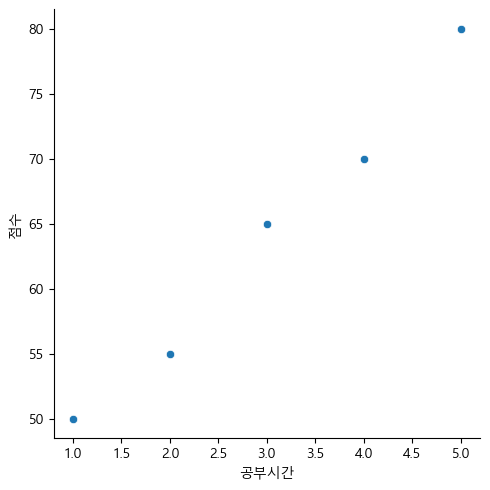

In [7]:
sns.relplot(data=data, x="공부시간", y="점수")

In [14]:
x = np.random.rand(10)
y = np.random.rand(10)
df1 = pd.DataFrame({"x": x, "y": y})
df1

,x,y
0,0.955896,0.017107
1,0.034690,0.240871
2,0.889028,0.689251
3,0.646804,0.273195
4,0.299167,0.513451
5,0.006564,0.993487
6,0.345784,0.127379
7,0.957404,0.915597
8,0.587198,0.494526
9,0.762042,0.451482


In [16]:
df1.corr()

,x,y
x,1.000000,-0.054829
y,-0.054829,1.000000


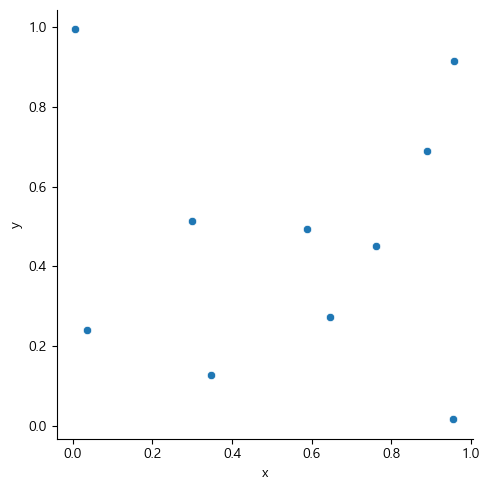

In [18]:
sns.relplot(data=df1, x="x", y="y")

In [20]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [22]:
titanic = sns.load_dataset("titanic")
titanic.to_csv("./data/titanic.csv", index=False)

In [24]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [26]:
titanic["age"] = titanic["age"].fillna(titanic["age"].median())
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic['deck'] = titanic['deck'].fillna('C')
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Text(0.5, 1.0, 'Survived Female')

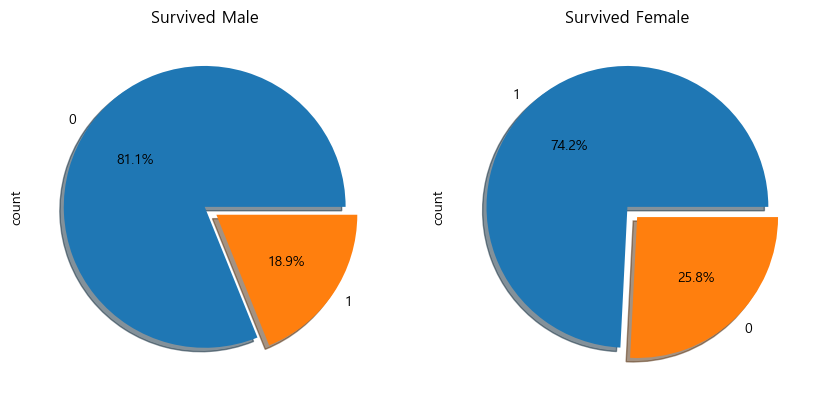

In [34]:
f, ax = plt.subplots(1, 2, figsize=(10, 5)) # subplots 메소드는 원래 반환값이 2개라서 figure, ax라는 두개의 변수를 할당해줘야 함
titanic["survived"][titanic["sex"]=="male"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
titanic["survived"][titanic["sex"]=="female"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title("Survived Male")
ax[1].set_title("Survived Female")

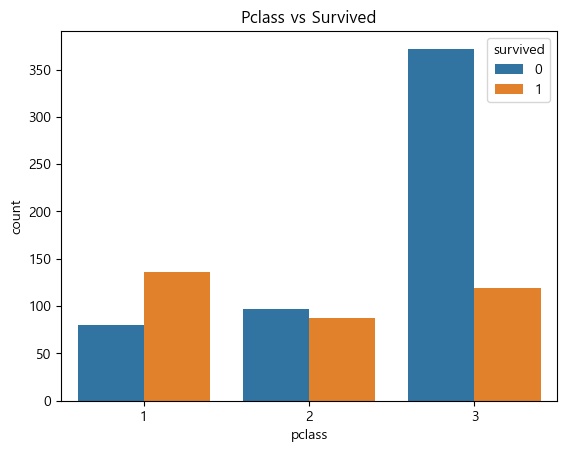

In [36]:
sns.countplot(x = 'pclass', hue = 'survived', data = titanic)
plt.title('Pclass vs Survived')
plt.show()

In [39]:
titanic2 = titanic.select_dtypes(include=[int, float,bool])
titanic2.shape
titanic_corr = titanic2.corr(method = 'pearson')
titanic_corr.to_csv('data/titanic_corr.csv', index = False)
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [43]:
print(titanic['survived'].corr(titanic['adult_male']))
print(titanic['survived'].corr(titanic['fare']))

-0.5570800422053255
0.2573065223849623


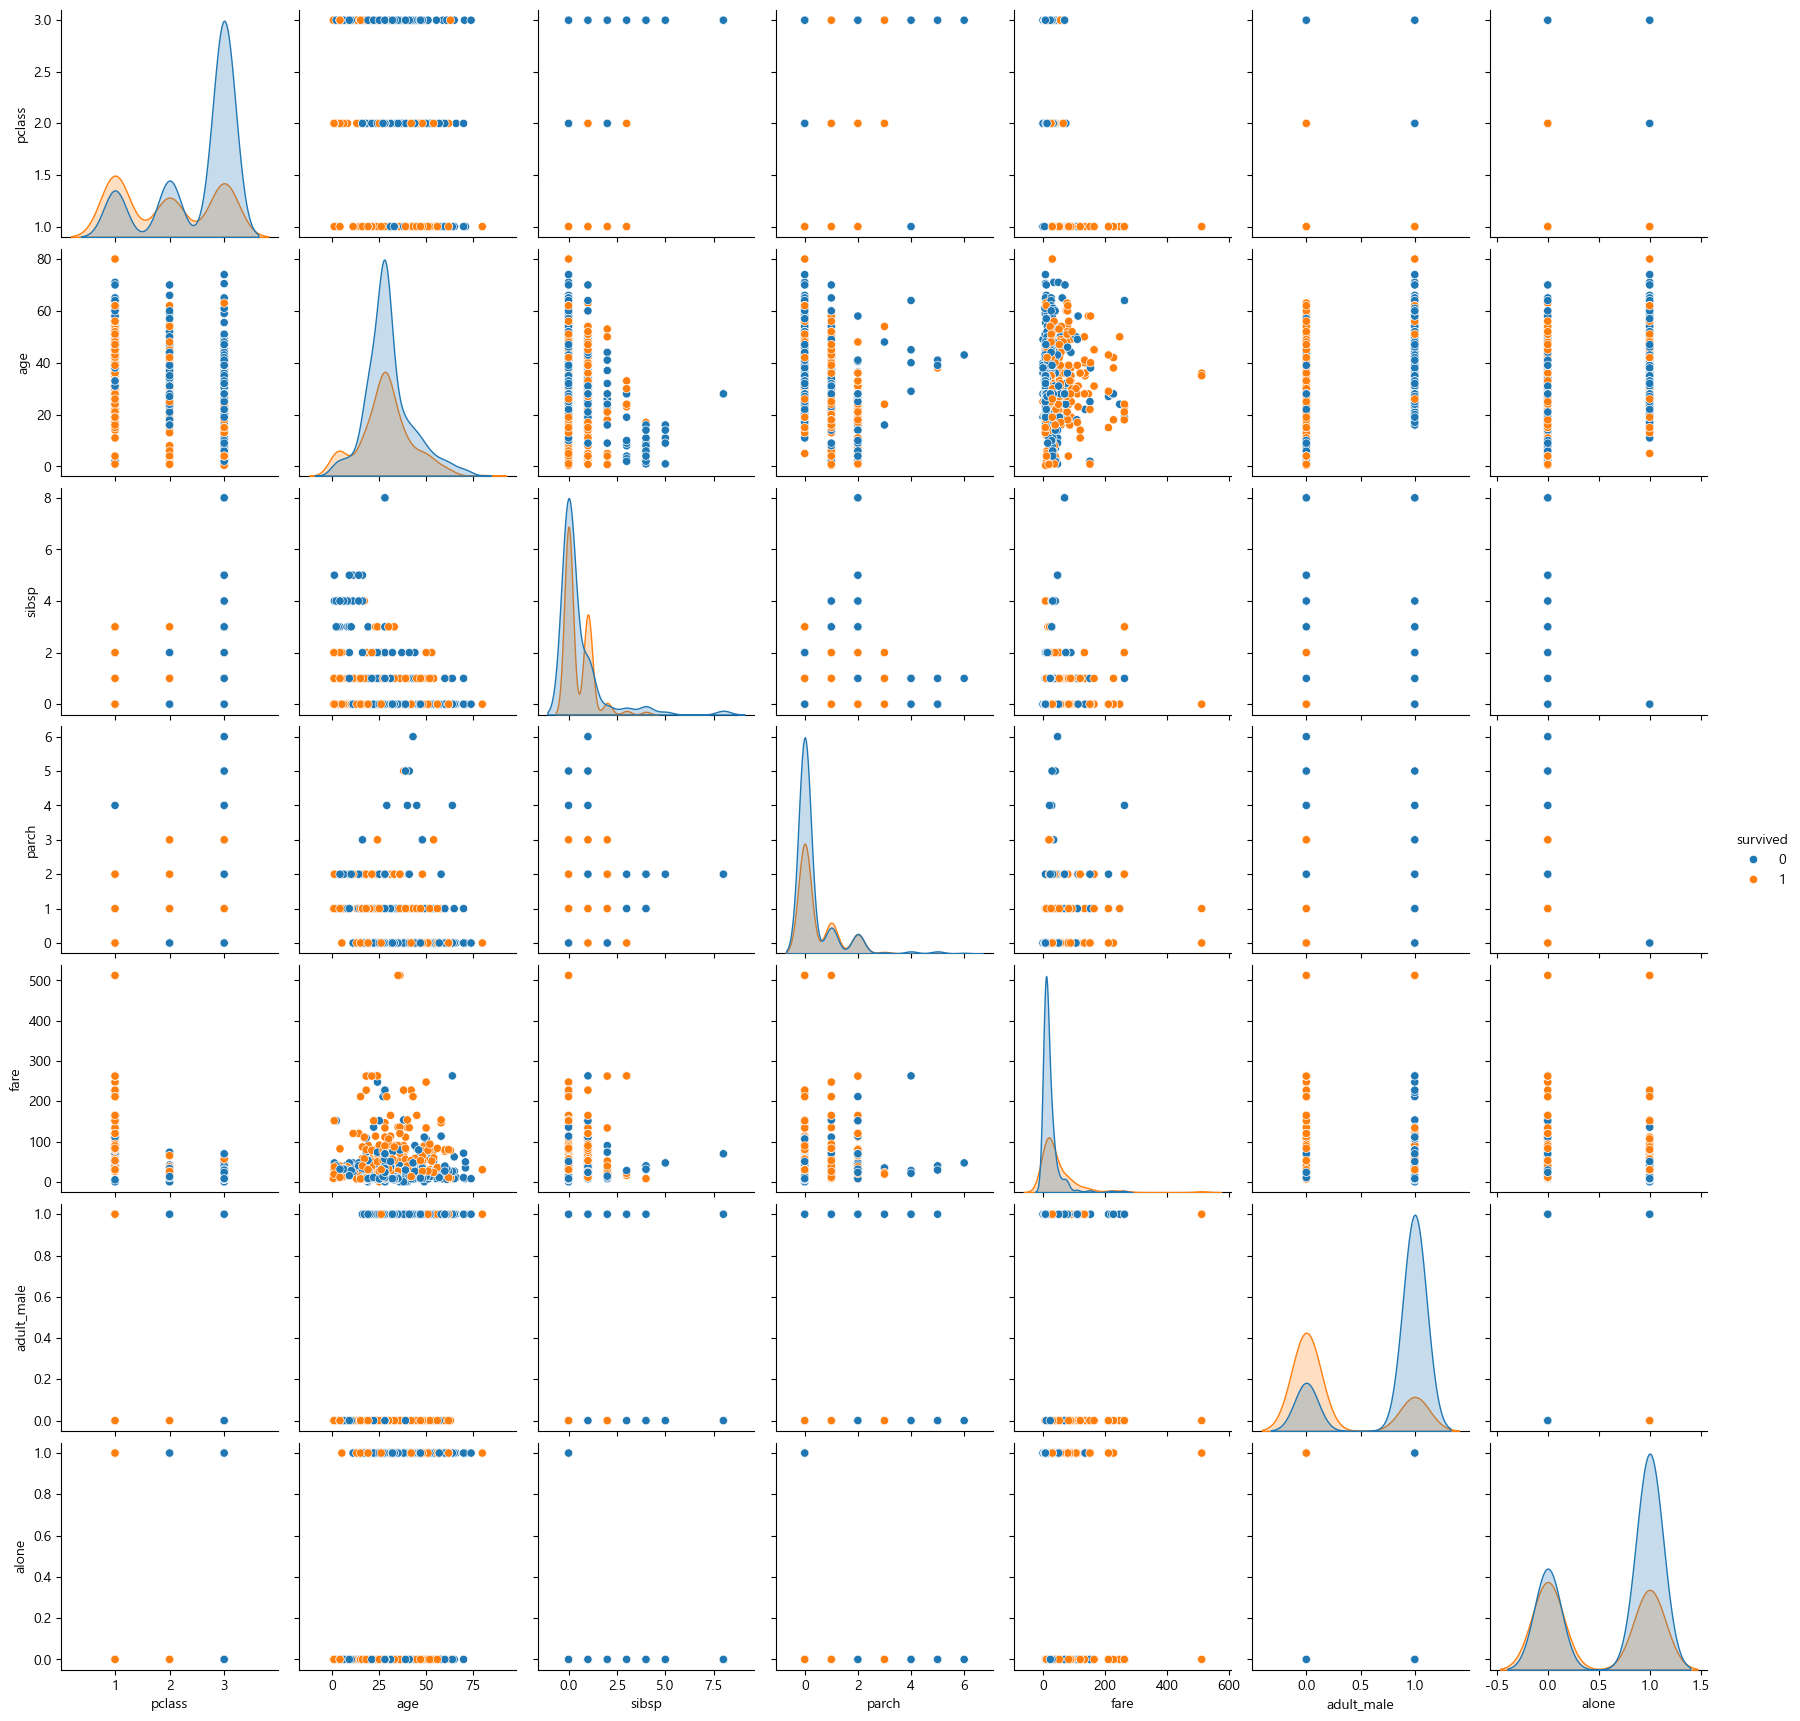

In [46]:
sns.pairplot(titanic, hue="survived")

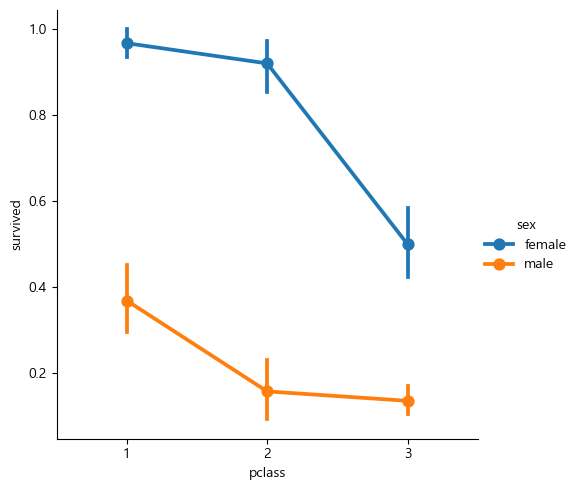

In [48]:
sns.catplot(x="pclass", y="survived", hue="sex", data=titanic, kind="point")

<Axes: >

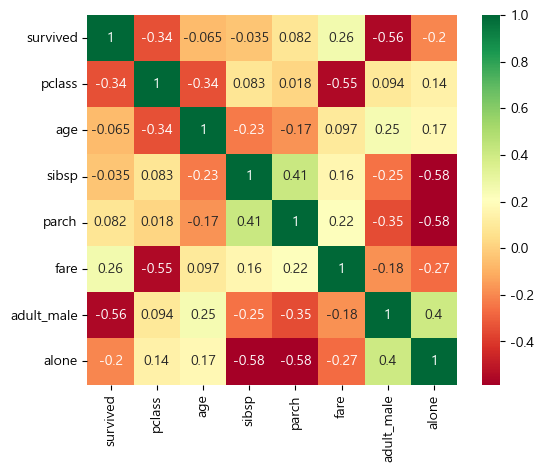

In [56]:
corr1 = titanic.corr(numeric_only=True)
sns.heatmap(corr1, square=True, annot=True, linecolor="white", cmap="RdYlGn")

In [58]:
def age_func(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [62]:
titanic["age2"] = titanic["age"].apply(age_func)
titanic["sex2"] = titanic["sex"].map({"female": 0, "male": 1})
titanic["family"] = titanic["sibsp"] + titanic["parch"] + 1
heatmap_data = titanic[["survived", "sex2", "age2", "pclass", "family", "fare"]]

corr3 = heatmap_data.corr()
corr3

,survived,sex2,age2,pclass,family,fare
survived,1.000000,-0.543351,-0.052184,-0.338481,0.016639,0.257307
sex2,-0.543351,1.000000,0.074415,0.131900,-0.200988,-0.182333
age2,-0.052184,0.074415,1.000000,-0.339368,-0.234514,0.100123
pclass,-0.338481,0.131900,-0.339368,1.000000,0.065997,-0.549500
family,0.016639,-0.200988,-0.234514,0.065997,1.000000,0.217138
fare,0.257307,-0.182333,0.100123,-0.549500,0.217138,1.000000


<Axes: >

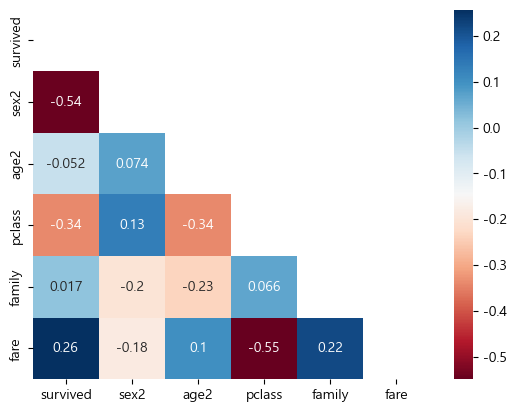

In [68]:
sns.heatmap(corr3, mask=np.triu(corr3), annot=True, cmap="RdBu")